<a href="https://colab.research.google.com/github/naenumtou/deepLearning/blob/main/linearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
print(f'Tensorflow version: {tf.__version__}')
%config InlineBackend.figure_format = 'retina'

#Checking GPU available
if tf.test.gpu_device_name() == '/device:GPU:0':
  print('GPU is available')
else:
  print('GPU is not available')

Text(0.5, 1.0, 'Time series data')

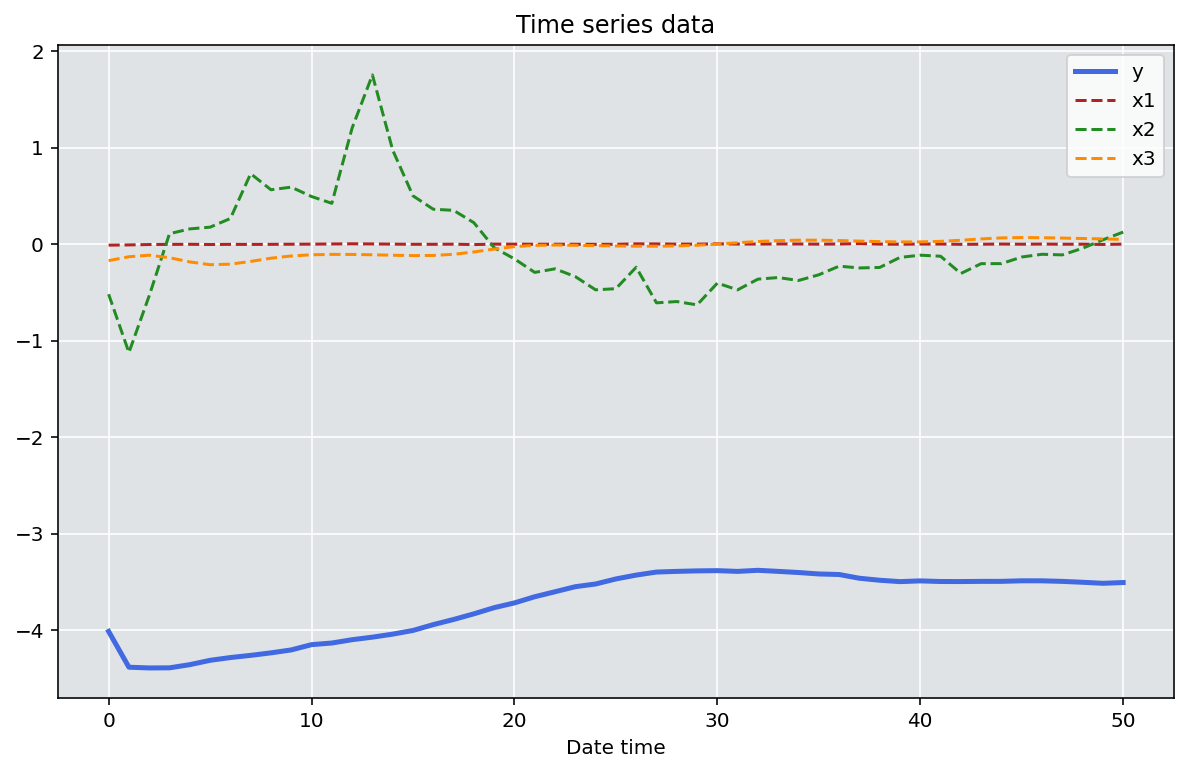

In [ ]:
#Import dataset
df = pd.read_csv('https://raw.githubusercontent.com/naenumtou/statisticalModel/main/datasets/Bayesian_model.csv')
x = df[['x1','x2','x3']]
y = df['y']

plt.figure(figsize = (10,6))
ax = plt.axes()
ax.set_facecolor('#dfe3e6')
plt.grid(color = 'w')
plt.plot(df['y'], c = 'royalblue', linewidth = 2.5, label = 'y')
plt.plot(df['x1'], c = 'firebrick', linestyle = '--', label = 'x1')
plt.plot(df['x2'], c = 'forestgreen', linestyle = '--', label = 'x2')
plt.plot(df['x3'], c = 'darkorange', linestyle = '--', label = 'x3')
plt.xlabel('Date time')
plt.legend()
plt.title('Time series data')

In [ ]:
#Multiple linear regression from scratch
W1 = tf.Variable(np.random.randn())
W2 = tf.Variable(np.random.randn())
W3 = tf.Variable(np.random.randn())
b = tf.Variable(np.random.randn())
lr = 0.1

for epoch in range(100000):
  with tf.GradientTape() as t:
    y = (W1 * df['x1']) + (W2 * df['x2']) + (W3 * df['x3']) + b
    loss = tf.reduce_mean((y - df['y'])**2)
  dW1, dW2, dW3, db = t.gradient(loss, [W1, W2, W3, b])
  W1.assign_sub(lr * dW1)
  W2.assign_sub(lr * dW2)
  W3.assign_sub(lr * dW3)
  b.assign_sub(lr * db)
  if not epoch % 5000:
    print(epoch, W1.numpy(), W2.numpy(), W3.numpy(), b.numpy(), loss.numpy())

0 0.036594782 1.3330247 0.38275766 -0.2781242 18.877241
5000 0.19926678 -0.079745315 3.6152542 -3.6022751 0.019064685
10000 0.29830837 -0.078959376 3.6267447 -3.6017861 0.019044155
15000 0.39664203 -0.07921105 3.6246412 -3.6018493 0.01902482
20000 0.49454826 -0.07946162 3.6225464 -3.6019123 0.01900563
25000 0.592051 -0.07971115 3.6204607 -3.601975 0.018986616
30000 0.6891031 -0.07995957 3.6183846 -3.6020374 0.018967763
35000 0.78577256 -0.08020697 3.616316 -3.6020994 0.01894907
40000 0.8820024 -0.080453224 3.6142578 -3.6021614 0.018930543
45000 0.9778258 -0.08069849 3.6122077 -3.602223 0.018912166
50000 1.0732623 -0.08094279 3.6101658 -3.6022842 0.018893946
55000 1.1682396 -0.08118583 3.6081338 -3.6023452 0.01887589
60000 1.2628968 -0.08142807 3.6061091 -3.602406 0.018857973
65000 1.3570721 -0.08166912 3.6040945 -3.6024668 0.018840233
70000 1.450819 -0.08190903 3.6020885 -3.602527 0.018822636
75000 1.5442572 -0.08214822 3.6000893 -3.602587 0.018805174
80000 1.6372404 -0.08238614 3.5981

In [ ]:
#Model loss and coefficient
print(f'Model loss: {loss.numpy()}')
print(f'Intercept: {b.numpy()}')
print(f'Coefficient x1: {W1.numpy()}')
print(f'Coefficient x2: {W2.numpy()}')
print(f'Coefficient x3: {W3.numpy()}')

Model loss: 0.018720148131251335
Intercept: -3.6028833389282227
Coefficient x1: 2.005181074142456
Coefficient x2: -0.08332784473896027
Coefficient x3: 3.590228319168091


Text(0.5, 1.0, 'Backtesting')

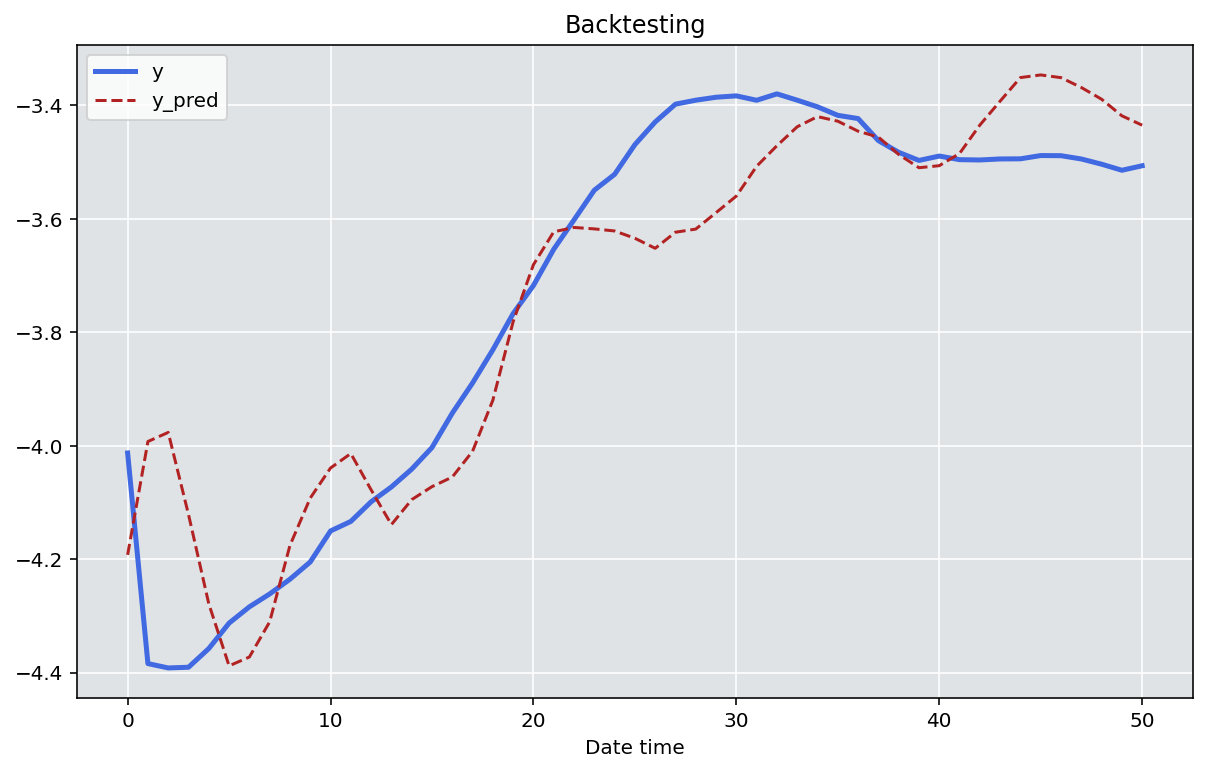

In [ ]:
#Plot result from the model
z = (W1 * df['x1']) + (W2 * df['x2']) + (W3 * df['x3']) + b #Prediction

plt.figure(figsize = (10,6))
ax = plt.axes()
ax.set_facecolor('#dfe3e6')
plt.grid(color = 'w')
plt.plot(df['y'], c = 'royalblue', linewidth = 2.5, label = 'y')
plt.plot(z, c = 'firebrick', linestyle = '--', label = 'y_pred')
plt.xlabel('Date time')
plt.legend()
plt.title('Backtesting (scratch)')

In [ ]:
#Multiple linear regression using Keras
model = Sequential()
model.add(Dense(500, activation = 'relu', input_shape = [df.shape[1] - 1]))
model.add(Dense(500, activation = 'relu'))
model.add(Dense(500, activation = 'relu'))
model.add(Dense(1))
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 64)                256       
_________________________________________________________________
dense_33 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_34 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 65        
Total params: 16,897
Trainable params: 16,897
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Defining the optimizer
optz = tf.keras.optimizers.RMSprop(lr = 0.001)

#Complie the model
model.compile(optimizer = optz, loss = 'mse')

In [ ]:
#Fitting model
model.fit(x, y, epochs = 500)

Text(0.5, 1.0, 'Backtesting (Keras)')

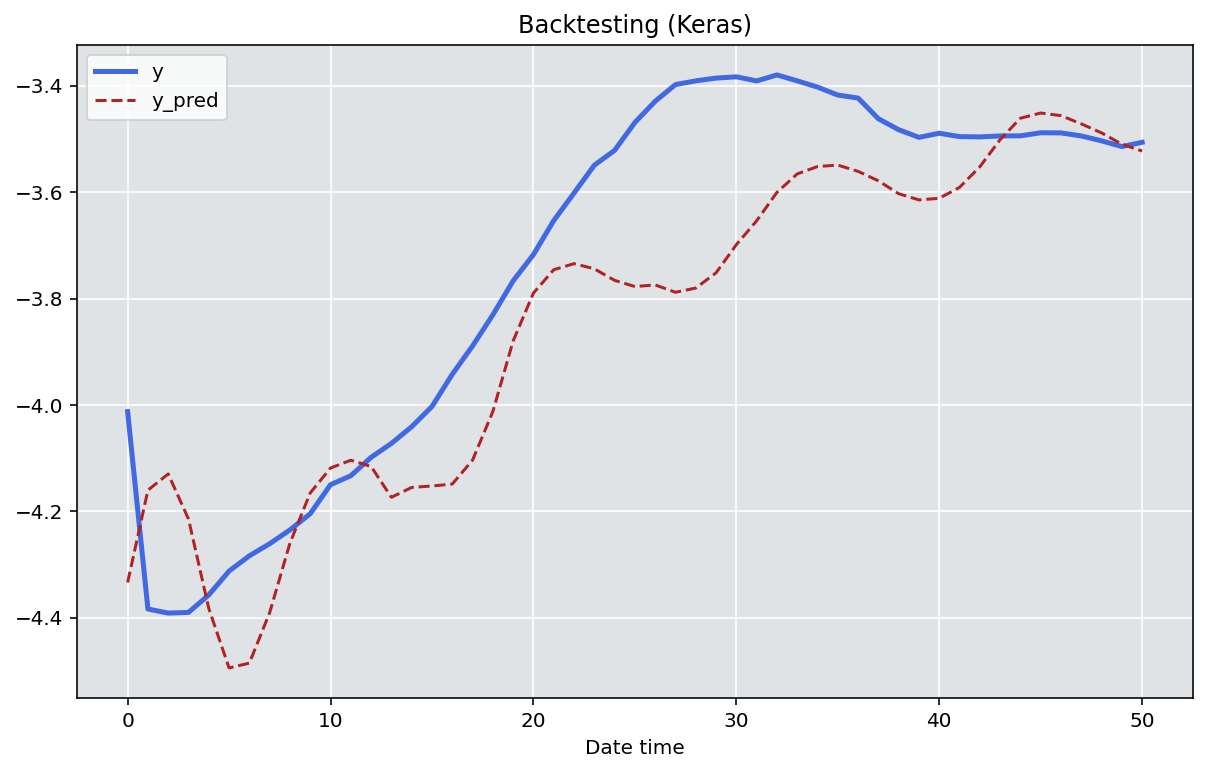

In [ ]:
#Plot result from the model
z = model.predict(x) #Prediction

plt.figure(figsize = (10,6))
ax = plt.axes()
ax.set_facecolor('#dfe3e6')
plt.grid(color = 'w')
plt.plot(df['y'], c = 'royalblue', linewidth = 2.5, label = 'y')
plt.plot(z, c = 'firebrick', linestyle = '--', label = 'y_pred')
plt.xlabel('Date time')
plt.legend()
plt.title('Backtesting (Keras)')